In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


def country(data1):
    # Process the input data here
    result = data1  # For example, converting the input to uppercase
    return result
def year(data2):
    # Process the input data here
    result = int(data2)  # For example, converting the input to uppercase
    return result

dataset = pd.read_csv('emissiondata.csv')

In [3]:
dataset.replace('NaN',np.nan,inplace=True)
dataset.replace(np.nan,0,inplace=True)

In [4]:
dataset = dataset.loc[dataset["CO2 emission (Tons)"] != 0]

In [5]:
country = country()
year = year()


In [6]:
newdata = dataset.loc[dataset["Country"]==country]

In [7]:
newdata['Year'] = (newdata['Year']-1750)/270

C:\Users\SD\AppData\Local\Temp\ipykernel_17204\4254652316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['Year'] = (newdata['Year']-1750)/270


In [8]:
newdata['CO2 emission (Tons)'] = (newdata['CO2 emission (Tons)']-newdata['CO2 emission (Tons)'].min())/(newdata['CO2 emission (Tons)'].max()-newdata['CO2 emission (Tons)'].min())

C:\Users\SD\AppData\Local\Temp\ipykernel_17204\1619391986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['CO2 emission (Tons)'] = (newdata['CO2 emission (Tons)']-newdata['CO2 emission (Tons)'].min())/(newdata['CO2 emission (Tons)'].max()-newdata['CO2 emission (Tons)'].min())


In [9]:
X = newdata.iloc[:,4].values
Y = newdata.iloc[:,5].values

In [10]:
Y.reshape(len(Y),1)

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.03661180e-07],
       [8.72529166e-06],
       [1.75747868e-05],
       [2.73092314e-05],
       [9.98129894e-05],
       [1.71167866e-04],
       [2.67487633e-04],
       [3.55780754e-04],
       [4.35224379e-04],
       [5.53217647e-04],
       [5.94686071e-04],
       [6.40268733e-04],
       [7.04280081e-04],
       [7.72452244e-04],
       [8.48573427e-04],
       [9.32690207e-04],
       [1.02185275e-03],
       [1.12463110e-03],
       [1.23805989e-03],
       [1.34521641e-03],
       [1.45807076e-03],
       [1.59430641e-03],
       [1.74300897e-03],
       [1.88377805e-03],
       [2.00916142e-03],
       [2.15121911e-03],
       [2.29574314e-03],
       [2.44745581e-03],
       [2.60808263e-03],
       [2.77859422e-03],
       [2.94208813e-03],
       [3.12087752e-03],
       [3.32958167e-03],
       [3.57363519e-03],
       [3.84886906e-03],
       [4.10518526e-03],
       [4.33951843e-03],


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X.reshape(len(X),1))
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly,Y)

LinearRegression()

In [ ]:
year = 1750
Y_pred = lin_reg_poly.predict(poly_reg.fit_transform([[(year-1750)/270]]))

In [14]:
outcome = Y_pred

In [15]:
print(outcome)

[0.04378253]


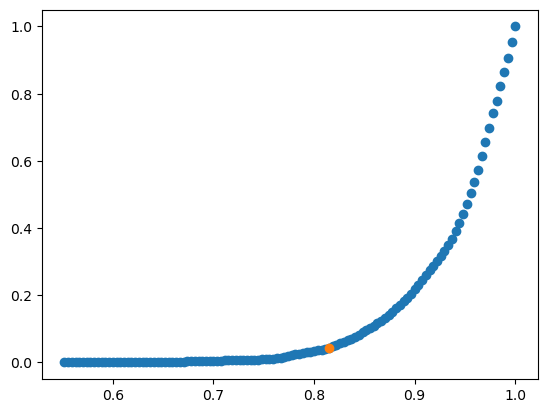

In [16]:
plt.scatter(X,Y)
plt.scatter((year-1750)/270 , Y_pred)
plt.show()

In [17]:
import pickle
pickle.dump(lin_reg_poly , open("RegressionFinal.pkl", "wb"))